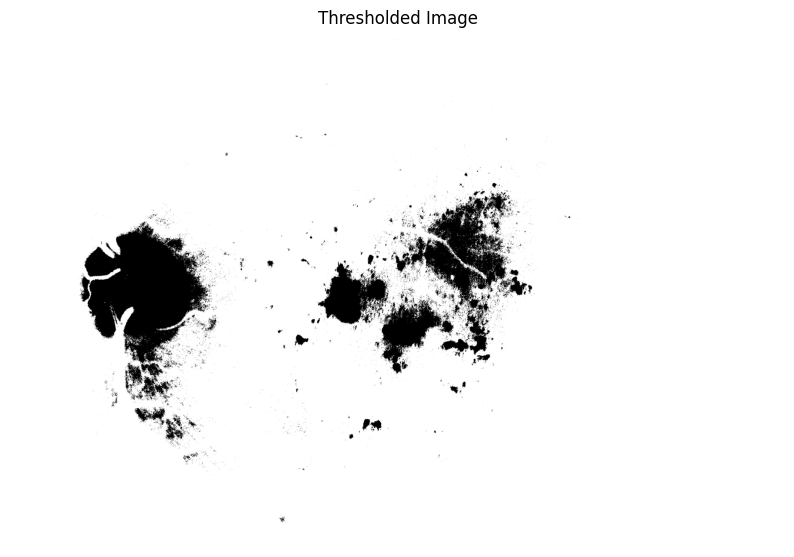

In [2]:
import cv2
import matplotlib.pyplot as plt

def read_image(path):
    img = cv2.imread(path)
    return img

def show_image(window_name, img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.title(window_name)
    plt.axis('off')
    plt.show()
    '''
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''
img = read_image('A. Segmentation/1. Original Images/a. Training Set/IDRiD_03.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_threshold_inv = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ret, img_threshold = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
show_image('Thresholded Image', img_threshold_inv)

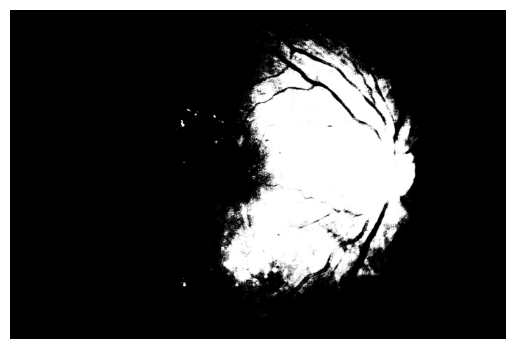

In [10]:
show_image('Thresholded Image', img_threshold)

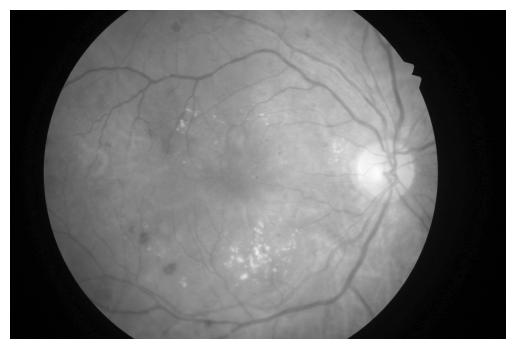

In [9]:
show_image('Thresholded Image', img)

[[[    1    -1    -1    -1]
  [    2     0    -1    -1]
  [    3     1    -1    -1]
  ...
  [15564 15562    -1    -1]
  [15565 15563    -1    -1]
  [   -1 15564    -1    -1]]]


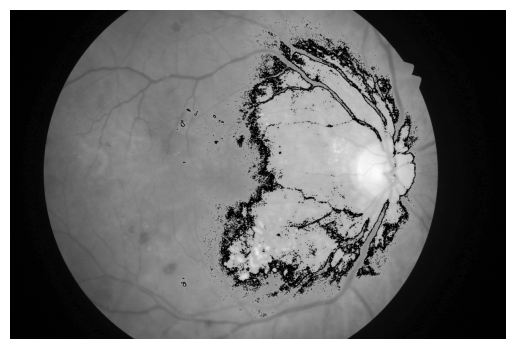

In [22]:
contours, hierarchy = cv2.findContours(img_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)
print(hierarchy)
show_image('Contours', img_contours)

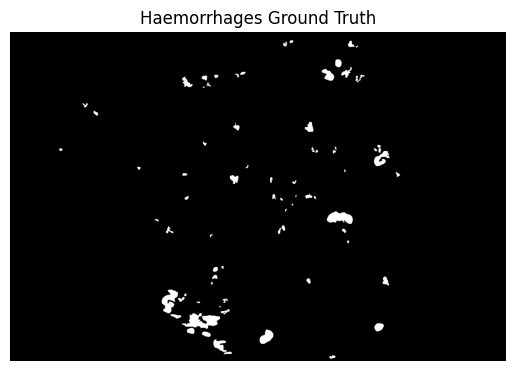

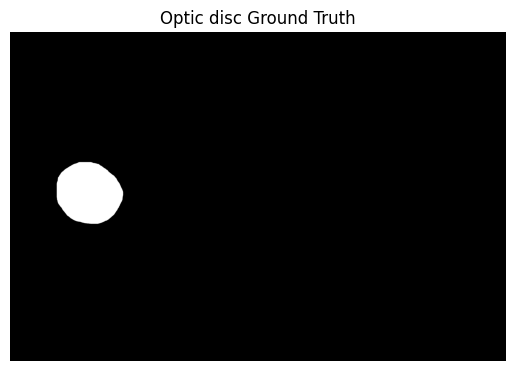

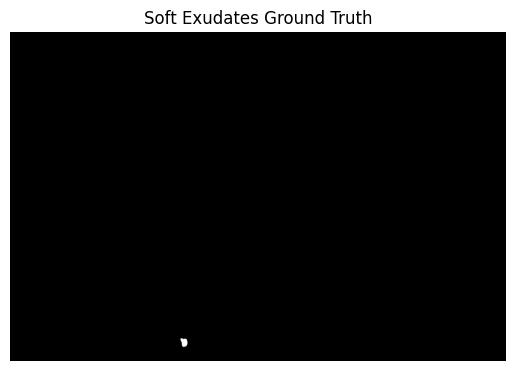

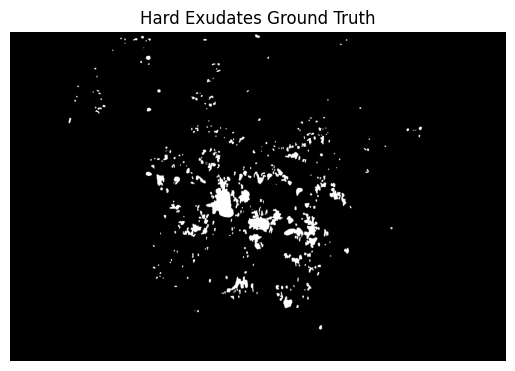

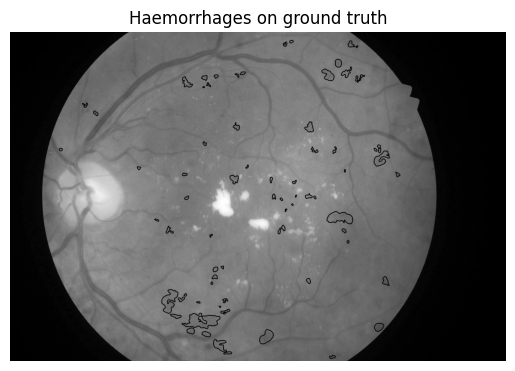

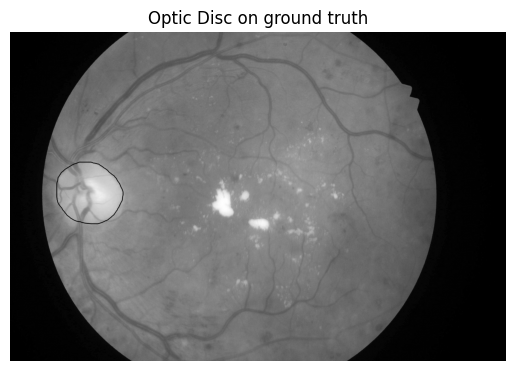

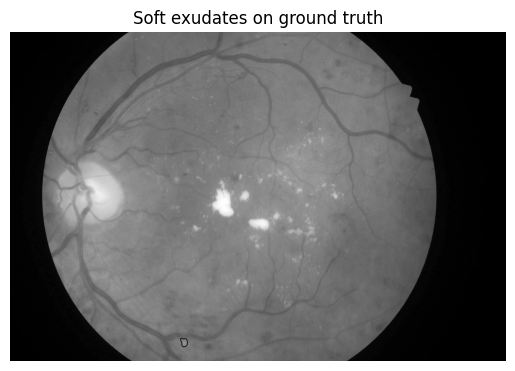

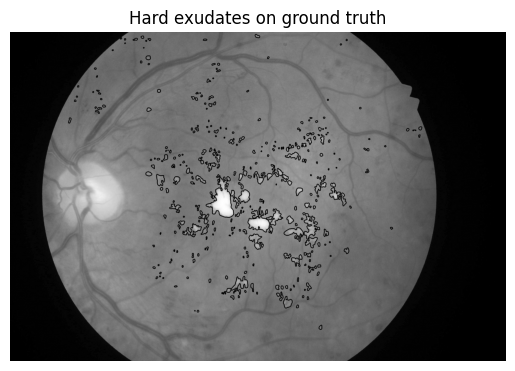

[[[ 599 1131]]

 [[ 598 1132]]

 [[ 594 1132]]

 ...

 [[ 704 1132]]

 [[ 701 1132]]

 [[ 700 1131]]]
(2848, 4288) (2848, 4288)


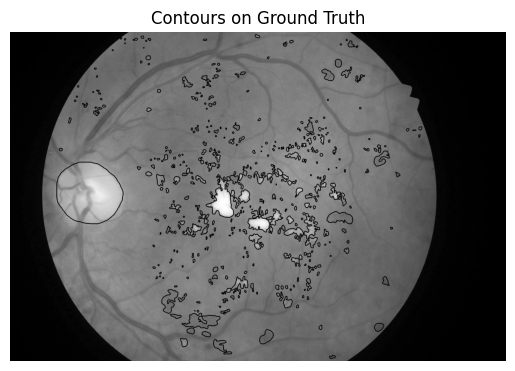

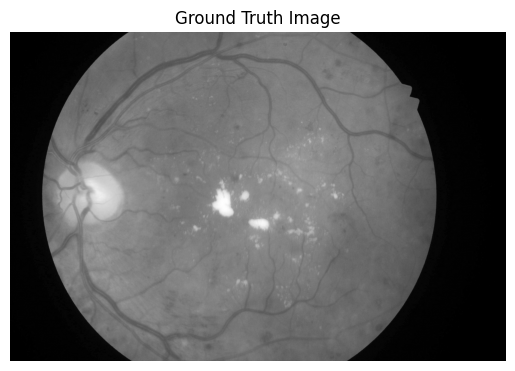

In [ ]:
img_he = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/2. Haemorrhages/IDRiD_03_HE.tif', cv2.IMREAD_UNCHANGED)
img_optic_disc = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/IDRiD_03_OD.tif', cv2.IMREAD_UNCHANGED)
img_se = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates/IDRiD_03_SE.tif', cv2.IMREAD_UNCHANGED)
img_ha = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_03_EX.tif', cv2.IMREAD_UNCHANGED)


show_image('Haemorrhages Ground Truth', img_he)
show_image('Optic disc Ground Truth', img_optic_disc)
show_image('Soft Exudates Ground Truth', img_se)
show_image('Hard Exudates Ground Truth', img_ha)

contours, hierarchy = cv2.findContours(img_he, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_optic_disc, hierarchy_optic_disc = cv2.findContours(img_optic_disc, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_soft_exudates, hierarchy = cv2.findContours(img_se, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_hard_exudates, hierarchy = cv2.findContours(img_ha, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 5)
show_image('Haemorrhages on ground truth', img_contours)
img_contours = cv2.drawContours(img.copy(), contours_optic_disc, -1, (0,255,0), 5)
show_image('Optic Disc on ground truth', img_contours)
img_contours = cv2.drawContours(img.copy(), contours_soft_exudates, -1, (0,255,0), 5)
show_image('Soft exudates on ground truth', img_contours)
img_contours = cv2.drawContours(img.copy(), contours_hard_exudates, -1, (0,255,0), 5)
show_image('Hard exudates on ground truth', img_contours)


contours += contours_optic_disc
contours += contours_soft_exudates
contours += contours_hard_exudates

img_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 5)
#img_contours = cv2.drawContours(img_contours.copy(), contours_optic_disc, -1, (0,255,0), 5)
#print(hierarchy)
print(contours_optic_disc[0])
print(img_contours.shape, img.shape)
show_image('Contours on Ground Truth', img_contours)
show_image('Ground Truth Image', img)

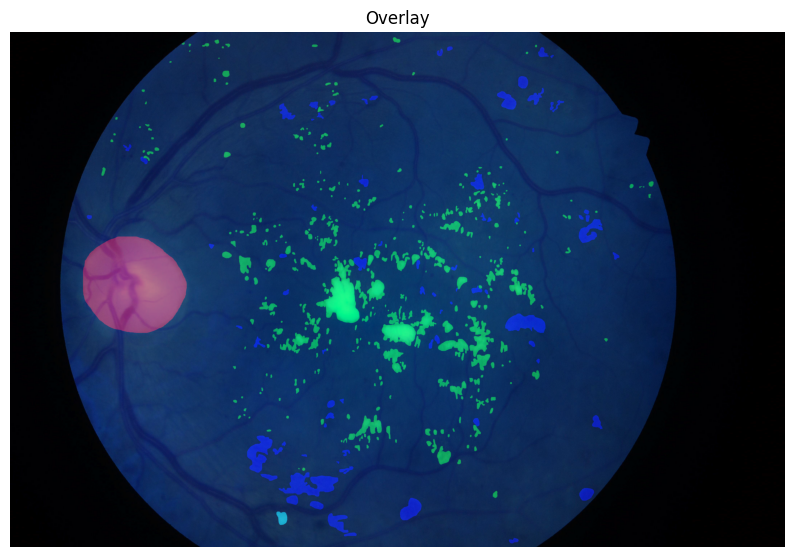

In [31]:
import cv2
import numpy as np

# --- Read masks (they are usually 0/255 binary) ---
img_he = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/2. Haemorrhages/IDRiD_03_HE.tif', cv2.IMREAD_UNCHANGED)
img_od = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/IDRiD_03_OD.tif', cv2.IMREAD_UNCHANGED)
img_se = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates/IDRiD_03_SE.tif', cv2.IMREAD_UNCHANGED)
img_ex = cv2.imread('A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_03_EX.tif', cv2.IMREAD_UNCHANGED)
img = read_image('A. Segmentation/1. Original Images/a. Training Set/IDRiD_03.jpg')

# ensure they are binary masks (0 or 255)
_, he = cv2.threshold(img_he, 1, 255, cv2.THRESH_BINARY)
_, od = cv2.threshold(img_od, 1, 255, cv2.THRESH_BINARY)
_, se = cv2.threshold(img_se, 1, 255, cv2.THRESH_BINARY)
_, ex = cv2.threshold(img_ex, 1, 255, cv2.THRESH_BINARY)

# original image (make sure it's BGR for cv2)
base = img.copy()   # img should be your original BGR image read via cv2.imread

# create a blank colored overlay
overlay = np.zeros_like(base, dtype=np.uint8)

# Choose colors (BGR format)
COLOR_HE = (0, 0, 255)      # Red
COLOR_OD = (255, 0, 0)      # Blue
COLOR_SE = (0, 255, 255)    # Yellow
COLOR_EX = (0, 255, 0)      # Green

# paint each mask into overlay
overlay[he > 0] = COLOR_HE
overlay[od > 0] = COLOR_OD
overlay[se > 0] = COLOR_SE
overlay[ex > 0] = COLOR_EX

# blend overlay on top of original
alpha = 0.45
result = cv2.addWeighted(base, 1 - alpha, overlay, alpha, 0)

show_image("Overlay", result)



## Learning about neural networks

In [6]:
import torch.nn as nn
import torch
# With square kernels and equal stride
m = nn.ConvTranspose2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.ConvTranspose2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
input = torch.randn(20, 16, 50, 100)
output = m(input)
print(f"Output size:{output.size()}")
# exact output size can be also specified as an argument
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 18, 3, stride=2, padding=1)
print(downsample(input).size())
upsample = nn.ConvTranspose2d(18, 16, 3, stride=2, padding=1)
h = downsample(input)
print(h.size())
output = upsample(h, output_size=input.size())
print(output.size())

Output size:torch.Size([20, 33, 93, 100])
torch.Size([1, 18, 6, 6])
torch.Size([1, 18, 6, 6])
torch.Size([1, 16, 12, 12])


In [84]:
input = torch.randn(1, 16, 12, 12)
m = nn.ConvTranspose2d(16, 33, 3, stride=2, padding=1)
input = input.to('mps')
m = m.to('mps')
upsample = m(input, output_size=(1, 33, 24, 24))
print(f"Upsampled size:{upsample.size()}")

Upsampled size:torch.Size([1, 33, 24, 24])


In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
input = np.random.randint(0, 256, (600, 600), dtype=np.uint8)
transform = A.Compose(
    [
        A.Resize(512, 512),
        A.Normalize(mean=(0.485, 0.456, 0.406),
                    std=(0.229, 0.224, 0.225)),
        A.ToTensorV2(),
    ]
)
a = transform(image=input)
print(a['image'].shape)

torch.Size([1, 512, 512])


In [12]:
import torch.nn as nn
import torch

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.relu2 = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        return x


class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.downlayer_1 = DoubleConv(3, 64)
        self.downlayer_2 = DoubleConv(64, 128)
        self.downlayer_3 = DoubleConv(128, 256)
        self.downlayer_4 = DoubleConv(256, 512)
        self.downlayer_5 = DoubleConv(512, 1024)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.uplayer_1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.uplayer_2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.uplayer_3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.uplayer_4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2) 
        self.double_conv_1 = DoubleConv(1024, 512)
        self.double_conv_2 = DoubleConv(512, 256)
        self.double_conv_3 = DoubleConv(256, 128)
        self.double_conv_4 = DoubleConv(128, 64)
        self.final_layer = nn.Conv2d(64, 6, kernel_size=1)
        # Define layers here
    
    def forward(self, x):
        # Define forward pass here
        d1 = self.downlayer_1(x) #[64, 512, 512]
        p1 = self.pool(d1) #[64, 256, 256]
        d2 = self.downlayer_2(p1) #[128, 256, 256]
        p2 = self.pool(d2) #[128, 128, 128]
        d3 = self.downlayer_3(p2) #[256, 128, 128]
        p3 = self.pool(d3) #[256, 64, 64]
        d4 = self.downlayer_4(p3) #[512, 64, 64]
        p4 = self.pool(d4) #[512, 32, 32]
        d5 = self.downlayer_5(p4) #[1024, 32, 32]
        u1 = self.uplayer_1(d5) #[512, 64, 64]
        u1 = torch.cat([u1, d4], dim=1) #[1024, 64, 64]
        u1 = self.double_conv_1(u1) #[512, 64, 64]
        u2 = self.uplayer_2(u1) #[256, 128, 128]
        u2 = torch.cat([u2, d3], dim=1) #[512, 128, 128]
        u2 = self.double_conv_2(u2) #[256, 128, 128]
        u3 = self.uplayer_3(u2) #[128, 256, 256]
        u3 = torch.cat([u3, d2], dim=1) #[256, 256, 256]
        u3 = self.double_conv_3(u3) #[128, 256, 256]
        u4 = self.uplayer_4(u3) #[64, 512, 512]
        u4 = torch.cat([u4, d1], dim=1) #[128, 512, 512]
        u4 = self.double_conv_4(u4) #[64, 512, 512]
        output = self.final_layer(u4) #[1, 512, 512]
        return output
        '''
        x = self.uplayer_2(x)
        x = self.uplayer_3(x)
        x = self.uplayer_4(x)
        '''
        return u1

In [43]:
import torch
DEVICE = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
img = read_image('A. Segmentation/1. Original Images/a. Training Set/IDRiD_03.jpg')
a = transform(image=img)
#a = torch.randn(1, 1, 572, 572)
b = a['image']
b = b.unsqueeze(0)
print(b.size())
unet = UNet()
unet = unet.to(DEVICE)
b = b.to(DEVICE)
output = unet(b)
print(output.argmax(dim=1).squeeze(0).cpu().size())
print(output.size())

torch.Size([1, 3, 512, 512])
torch.Size([512, 512])
torch.Size([1, 6, 512, 512])


In [16]:
img_folder = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/1. Original Images/a. Training Set/'
mask_folder_ma = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/1. Microaneurysms/'
mask_folder_ha = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/2. Haemorrhages/'
mask_folder_he = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/'
mask_folder_se = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates/'
mask_folder_od = '/Users/akhilgattu/Desktop/VLM_project/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/'
mask_folders = [mask_folder_ma, mask_folder_ha, mask_folder_he, mask_folder_se, mask_folder_od]

In [24]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch
import os

class MySegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # 1) Read image
        img = cv2.imread(self.image_paths[idx])            # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)         # RGB

        # 2) Read mask
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_UNCHANGED)

        # 3) Apply transforms (optional)
        if self.transform is not None:
            out = self.transform(image=img, mask=mask)
            img = out["image"]
            mask = out["mask"]
        else:
            # convert to tensor if no transforms
            img = torch.tensor(img).permute(2, 0, 1).float() / 255.0
            mask = torch.tensor(mask).long()

        return img, mask


img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
mask_paths = []
for i in range(len(mask_folders)):
    mask_paths.extend(os.path.join(mask_folders[i], f) for f in os.listdir(mask_folders[i]))

print(len(mask_paths))

seg_dataset = MySegmentationDataset(
    image_paths=img_paths,
    mask_paths=mask_paths,
    transform=None,
)


seg_data_loader = DataLoader(
    dataset=seg_dataset,
    batch_size=5,
    shuffle=False,
    num_workers=0,
)


for imgs, masks in seg_data_loader:
    print(f"Image batch size: {imgs.size()}")
    print(f"Mask batch size: {masks.size()}")


241
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size: torch.Size([5, 2848, 4288])
Image batch size: torch.Size([4, 3, 2848, 4288])
Mask ba

In [34]:
from pathlib import Path
stem = Path('A. Segmentation/1. Original Images/a. Training Set/IDRiD_01_MA.jpg').stem
parts = stem.split("_")
print(parts)
print("_".join(parts[:2]))

['IDRiD', '01', 'MA']
IDRiD_01


In [37]:
from torch.utils.data import DataLoader, Dataset
import torch
import os
import cv2
import numpy as np
from pathlib import Path

# mask_folders should be like:
# mask_folders = [mask_folder_ma, mask_folder_ha, mask_folder_he, mask_folder_se, mask_folder_od]

def make_key(filename):
    # IDRiD_01.jpg -> IDRiD_01
    # IDRiD_01_MA.tif -> IDRiD_01
    stem = Path(filename).stem
    parts = stem.split("_")
    return "_".join(parts[:2]) if len(parts) >= 2 else stem


def build_mask_map(mask_folder):
    """
    mask_map[key] = path_to_mask
    """
    mask_map = {}
    for f in os.listdir(mask_folder):
        fp = os.path.join(mask_folder, f)
        if os.path.isfile(fp):
            key = make_key(f)
            mask_map[key] = fp
    return mask_map


class MySegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_folders, transform=None):
        self.image_paths = sorted(image_paths)
        self.mask_folders = mask_folders
        self.transform = transform

        # Build one map per class folder
        self.mask_maps = [build_mask_map(mf) for mf in mask_folders]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # ---- Read image ----
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # ---- Find masks for this image ----
        key = make_key(Path(img_path).name)

        masks = []
        for mask_map in self.mask_maps:
            m = None
            mask_path = mask_map.get(key, None)

            if mask_path is not None and os.path.exists(mask_path):
                m = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

            if m is None:
                # Create empty mask same height/width as image
                h, w = img.shape[:2]
                m = np.zeros((h, w), dtype=np.float32)
            else:
                m = (m > 0).astype(np.float32)

            masks.append(m)


        # Stack -> [H, W, 5]
        mask_stack = np.stack(masks, axis=-1)

        # ---- Apply transform ----
        if self.transform is not None:
            out = self.transform(image=img, mask=mask_stack)
            img = out["image"]              # [3,H,W]
            mask_stack = out["mask"]        # [H,W,5]

        else:
            img = torch.tensor(img).permute(2, 0, 1).float() / 255.0
            mask_stack = torch.tensor(mask_stack).float()

        # Convert [H,W,5] -> [5,H,W]
        mask_stack = mask_stack.permute(2, 0, 1)

        return img, mask_stack


# ----------------------------
# Use it
# ----------------------------
img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
img_paths = [p for p in img_paths if os.path.isfile(p)]

seg_dataset = MySegmentationDataset(
    image_paths=img_paths,
    mask_folders=mask_folders,
    transform=None
)

seg_data_loader = DataLoader(
    dataset=seg_dataset,
    batch_size=5,
    shuffle=False,
    num_workers=0,
)

for imgs, masks in seg_data_loader:
    print("Image batch size:", imgs.shape)  # [B,3,H,W]
    print("Mask batch size :", masks.shape) # [B,5,H,W]
    break


Image batch size: torch.Size([5, 3, 2848, 4288])
Mask batch size : torch.Size([5, 5, 2848, 4288])


In [19]:
img = read_image('A. Segmentation/1. Original Images/a. Training Set/IDRiD_03.jpg')
a = transform(image=img)
print(a['image'].shape)
print(a['image'].dtype)

torch.Size([3, 512, 512])
torch.float32


In [21]:
print("bytes per element:", a['image'].element_size())
print("num elements:", a['image'].numel())
print("total MB:", (a['image'].numel() * a['image'].element_size()) / (1024**2))

bytes per element: 4
num elements: 786432
total MB: 3.0


In [23]:
unet = UNet()
i = 0
for name, param in unet.named_parameters():
    i += 1
    if i == 2:
        break
    print(name, param, param.size())

downlayer_1.weight Parameter containing:
tensor([[[[ 0.0014, -0.1004, -0.0918,  0.0561, -0.0299],
          [-0.0243, -0.0855,  0.0226,  0.1076,  0.0260],
          [-0.0656, -0.0425, -0.0062, -0.0913, -0.0617],
          [-0.0221,  0.0082,  0.0988,  0.0642, -0.0438],
          [ 0.0015,  0.0364,  0.0256,  0.1121, -0.0088]],

         [[ 0.0414,  0.0382,  0.0952,  0.1147,  0.0906],
          [ 0.1091, -0.0668,  0.0810, -0.0895, -0.0040],
          [-0.0312,  0.0239, -0.0018,  0.0990,  0.0436],
          [-0.0423, -0.0390, -0.1120, -0.0160, -0.0296],
          [-0.0228, -0.0374,  0.0849, -0.0532, -0.0428]],

         [[ 0.1000, -0.0496,  0.0621,  0.0800, -0.0942],
          [ 0.0875, -0.0025,  0.0717, -0.0151, -0.1063],
          [ 0.0794,  0.0078,  0.0942, -0.1095,  0.0656],
          [-0.0974,  0.0668,  0.1099,  0.0384, -0.0183],
          [ 0.1097,  0.0680, -0.0256, -0.0805,  0.0436]]],


        [[[ 0.0168, -0.0146, -0.0019, -0.0073,  0.0166],
          [ 0.1038,  0.0163, -0.0840,  